<a href="https://colab.research.google.com/github/mssuhas/IIIT-training/blob/main/IIIT_training_decision_trees_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

note dataset dataframe looks like 
                     0  ...                                           4
0    Recency (months)  ...  whether he/she donated blood in March 2007
1                  2   ...                                           1
2                  0   ...                                           1
3                  1   ...                                           1
4                  2   ...                                           1
..                ...  ...                                         ...
744               23   ...                                           0
745               21   ...                                           0
746               23   ...                                           0
747               39   ...                                           0
748               72   ...                                           0

[749 rows x 5 columns]
note Dataset: 
 [['Recency (months)' 'Frequency (times)' 'Monetary (c.c. blood)'
  'Time

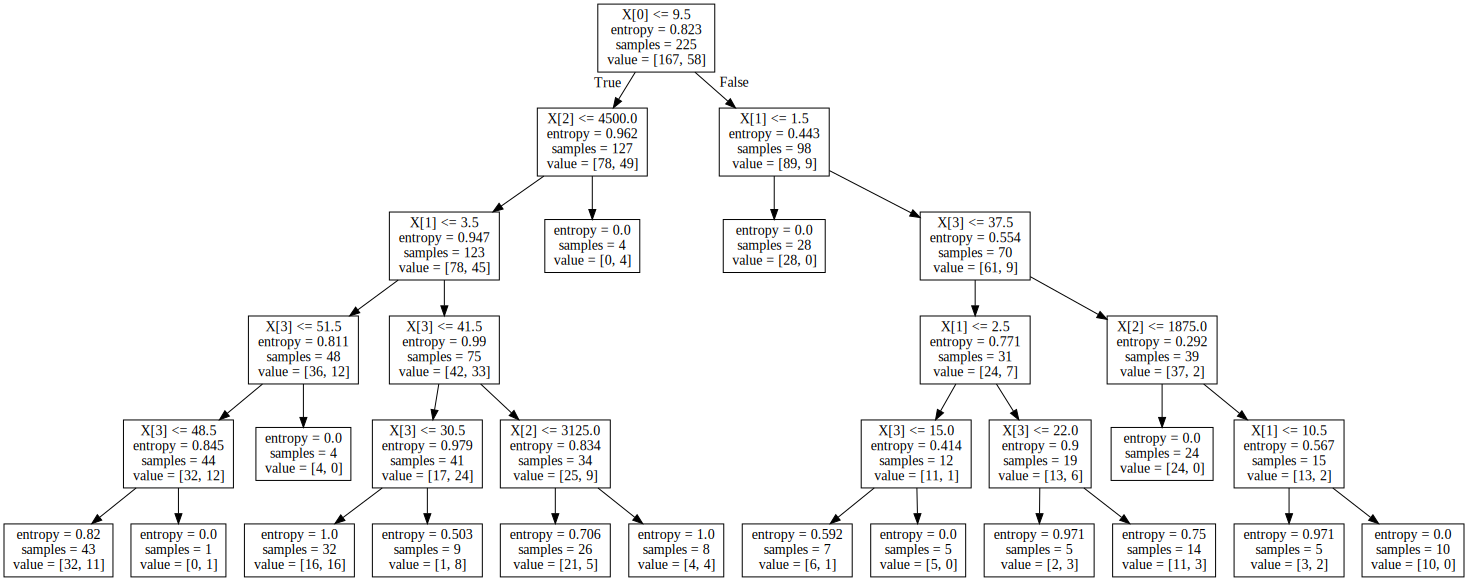

In [1]:
import pandas as pd
import numpy as np

path="/content/transfusion.data"
note_dataset_frame = pd.read_csv(path, header=None)
print("note dataset dataframe looks like \n", note_dataset_frame)

note_dataset = note_dataset_frame.to_numpy()
print("note Dataset: \n", note_dataset, "\n")
print("np.shape(note_dataset): ", note_dataset.shape, "\n")

note_dataset_features = note_dataset[:,0:4]
note_dataset_labels = note_dataset[:,4]
print("np.shape(note_dataset_features): ", np.shape(note_dataset_features), "\n")
print("np.shape(note_dataset_labels): ", np.shape(note_dataset_labels))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(note_dataset_features, note_dataset_labels, test_size=0.3, random_state=42)

print("Training data: \n\n", x_train, "\n")
print("Shape of training data: ", np.shape(x_train))
print("Training labels: \n", y_train, "\n")
print("Shape of training labels: ", np.shape(y_train),"\n")

# Getting testing data characteristics

print("Testing data: \n\n", x_test, "\n")
print("Shape of testing data: ", np.shape(x_test))
print("Testing labels: \n", y_test, "\n")
print("Shape of testing labels: ", np.shape(y_test),"\n")

from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=42,min_samples_split=4)

clf.fit(x_test,y_test)
predictions = clf.predict(x_test)
print("Predictions by Decision Tree: \n", predictions, "\n")

print("Predictions  Ground Truth: \n\n", np.column_stack((predictions,y_test)))

accuracy = clf.score(x_test,y_test)
print("Accuracy of the model: ", accuracy, "\n")

print("Feature importances = ", clf.feature_importances_)

print("Inferred value for the Max Features = ",clf.max_features_)
print(np.shape(clf.max_features_))

print("Number of features during fit = ", clf.n_features_)
print(np.shape(clf.n_features_))

print("Total outputs during fit = ",clf.n_outputs_)
print(np.shape(clf.n_outputs_))

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=5)
graph = graphviz.Source(dot_data)
print(graph)

graph